<span style="color: rgb(0,46,91);">

<font face = "Times New Roman" size = "6"><b><center>Práctica 1 - Covarianza y Correlación</center></b></font>

<center><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:auto;height:140px;" title="Logo ITESO"></center>
    
<font face = "Times New Roman" size = "5"><b><center>Análisis Estadístico Multivariado</center></b></font>

<font face = "Times New Roman" size = "4"><center>Samantha Sánchez Tinoco</center></font>
<font face = "Times New Roman" size = "4"><center>Marcela Quintero Pérez</center></font>

<div align="right"><font face = "Times New Roman" size = "2">03 de febrero de 2025.</font></div>

</span>


## Introducción
El análisis de los datos nos permiten identificar y comprender patrones para tomar decisiones informadas. Se llevará a cabo un análisis de un conjunto de datos relacionados con el desempeño de estudiantes en sus evaluaciones. El propósito de este análisis es explorar la información contenida para descubrir posibles tendencias y relaciones.

### Objetivo
Realizar un análisis exploratorio y estadístico del conjunto de datos seleccionado **"Student Performance Factors"** sobre el desempeño de los estudiantes en sus exámenes.

In [3]:
# Librerías
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Conjunto de datos
El conjunto seleccionado de datos **Student Performance Factors** incluye un total de 6,607 observaciones, correspondientes a 15 variables que capturan diversos factores relacionados con el rendimiento estudiantil, de las cuales 7 variables son numéricas y 8 son categóricas.

### Variables: 
- **Hours_Studied:** Número de horas estudiadas por semana.
- **Attendance:** Porcentaje de asistencia a clases.
- **Parental_Involvement:** Nivel de involucramiento de los padres en la educación del estudiante. (Low, Medium, High)
- **Access_to_Resources:** Disponibilidad de recursos educacionales. (Low, Medium, High)
- **Extracurricular_Activities:** Si participa o no en actividades extracurriculares.
- **Sleep_Hours:** Promedio de horas dormidas por noche.
- **Previous_Scores:** Puntuaciones de exámenes previos.
- **Motivation_Level:** Nivel de motivación del estudiante. (Low, Medium, High)
- **Internet_Access:** Disponibilidad de acceso a internet. (Sí/No)
- **Tutoring_Sessions:** Número de asesorías tomadas por mes.
- **Family_Income:** Nivel de ingresos de la familia. (Low, Medium, High)
- **School_Type**: Escuela Pública o Privada.
- **Physical_Activity:** Horas promedio de ejercicio físico a la semana.
- **Gender:** Género del estudiante. (Femenino/Masculino)
- **Exam_Score:** Puntaje del exámen final.

In [89]:
df = pd.read_csv('./StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Physical_Activity,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,3,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,4,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,4,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,4,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,4,Female,70


Verificación de datos nulos o faltantes:

In [17]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Physical_Activity             0
Gender                        0
Exam_Score                    0
dtype: int64


## Desarrollo y Resultados

Para las variables numéricas, se obtendrán sus medidas de tendencia central y dispersión:

### Variables numéricas:

In [48]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

df_summary = df[numerical_cols].describe().T

# Medidas adicionales de tendencia central y dispersión
df_summary['median'] = df[numerical_cols].median()
df_summary['variance'] = df[numerical_cols].var()
df_summary['range'] = df[numerical_cols].max() - df[numerical_cols].min()

print(df_summary)

                    count       mean        std   min   25%   50%   75%  \
Hours_Studied      6607.0  19.975329   5.990594   1.0  16.0  20.0  24.0   
Attendance         6607.0  79.977448  11.547475  60.0  70.0  80.0  90.0   
Sleep_Hours        6607.0   7.029060   1.468120   4.0   6.0   7.0   8.0   
Previous_Scores    6607.0  75.070531  14.399784  50.0  63.0  75.0  88.0   
Tutoring_Sessions  6607.0   1.493719   1.230570   0.0   1.0   1.0   2.0   
Physical_Activity  6607.0   2.967610   1.031231   0.0   2.0   3.0   4.0   
Exam_Score         6607.0  67.235659   3.890456  55.0  65.0  67.0  69.0   

                     max  median    variance  range  
Hours_Studied       44.0    20.0   35.887221     43  
Attendance         100.0    80.0  133.344178     40  
Sleep_Hours         10.0     7.0    2.155377      6  
Previous_Scores    100.0    75.0  207.353789     50  
Tutoring_Sessions    8.0     1.0    1.514304      8  
Physical_Activity    6.0     3.0    1.063438      6  
Exam_Score         10

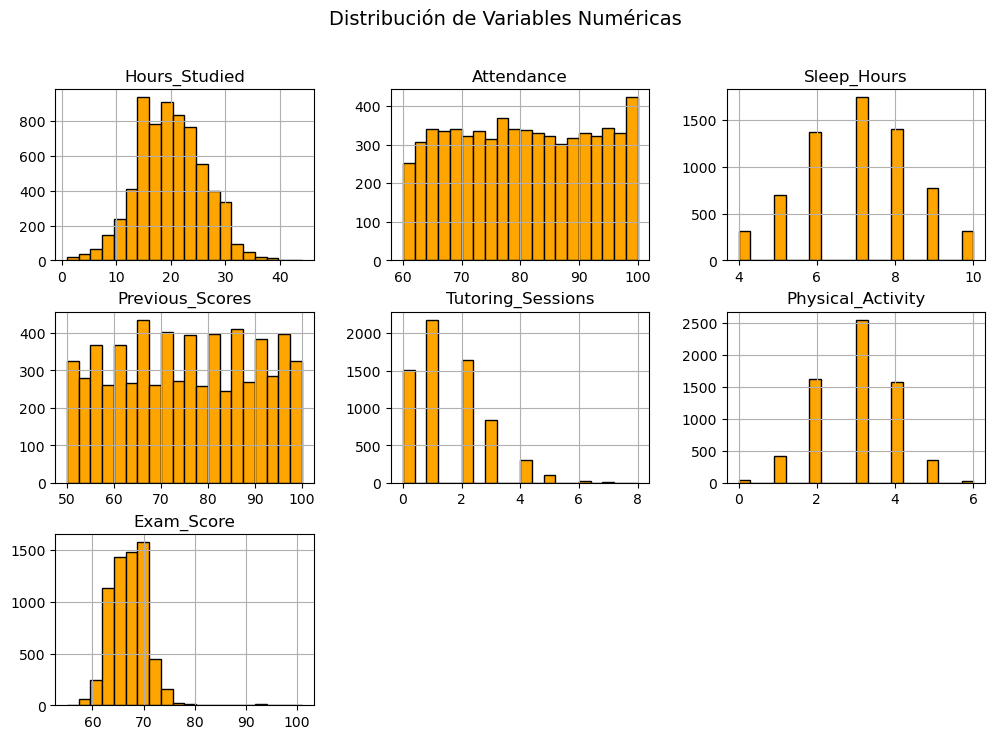

In [99]:
# Histogramas de las variables
df[numerical_cols].hist(figsize=(12, 8), bins=20, color='orange', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=14)
plt.show()

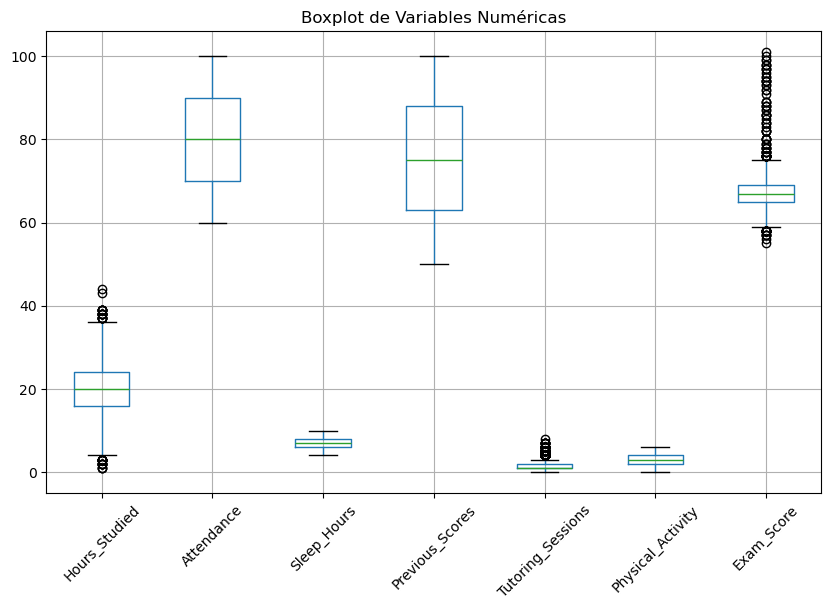

In [103]:
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Numéricas")
plt.show()

Con los valores resultantes podemos observar:

- Los estudiantes dedican un tiempo de estudio promedio de 20 horas por semana, existen valores atípicos por debajo de las 10 horas y por encima de las 40 horas, indicando que algunos estudiantes estudian significativamente menos o más que la mayoría.
- Existe una asistencia promedio alta del 80%.
- Hay un promedio de 7 horas de sueño con poca variabilidad, lo que indica que la mayoría de los estudiantes mantiene patrones de sueño relativamente constantes.
- Las sesiones de tutoría son poco frecuentes, con un número bajo de estudiantes que buscan apoyo adicional fuera del aula (menos de dos sesiones). Hay valores atípicos, lo que podría indicar que algunos estudiantes requieren mayor apoyo académico.
- La mayoría de los estudiantes realizan en promedio 3 horas de ejercicio a la semana, existen valores atípicos donde los estudiantes realizan más de 5 horas de ejercicio o ninguna.
- Los puntajes del examen están relativamente concentrados alrededor de la media (67 puntos), lo que indica un rendimiento académico moderado, pero también refleja una variabilidad considerable que podría ser influenciada por los factores mencionados anteriormente, como el tiempo de estudio y las sesiones de tutoría.

En resumen, los estudiantes parecen tener un rendimiento académico promedio, pero existen áreas de mejora en cuanto a la asistencia, las sesiones de tutoría y la actividad física, que podrían tener un impacto positivo en su desempeño general.

Con los datos obtenidos previamente, se calcularán y analiszaran las correlaciones entre las variables:

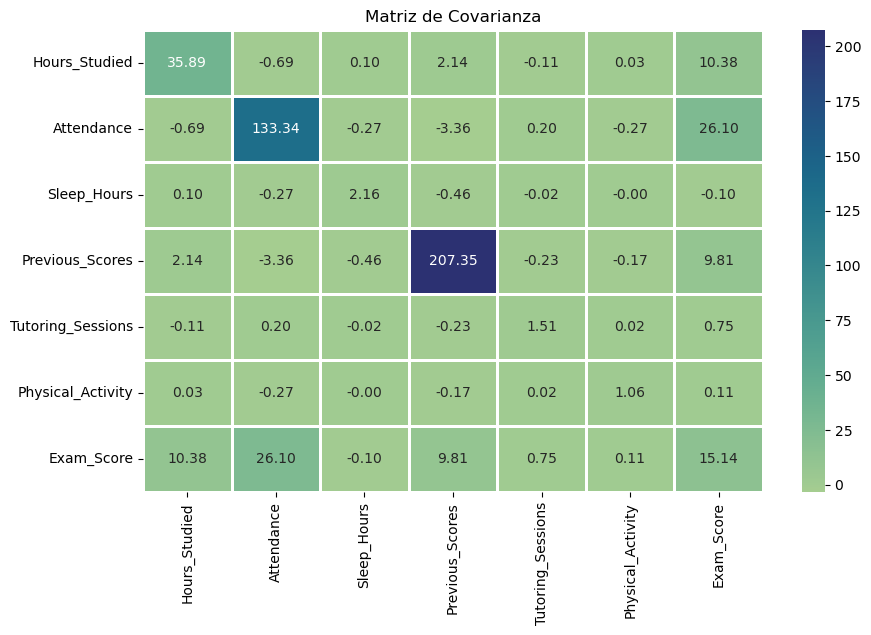

In [149]:
cov_matrix = df[numerical_cols].cov()

plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=1)
plt.title("Matriz de Covarianza")
plt.show()

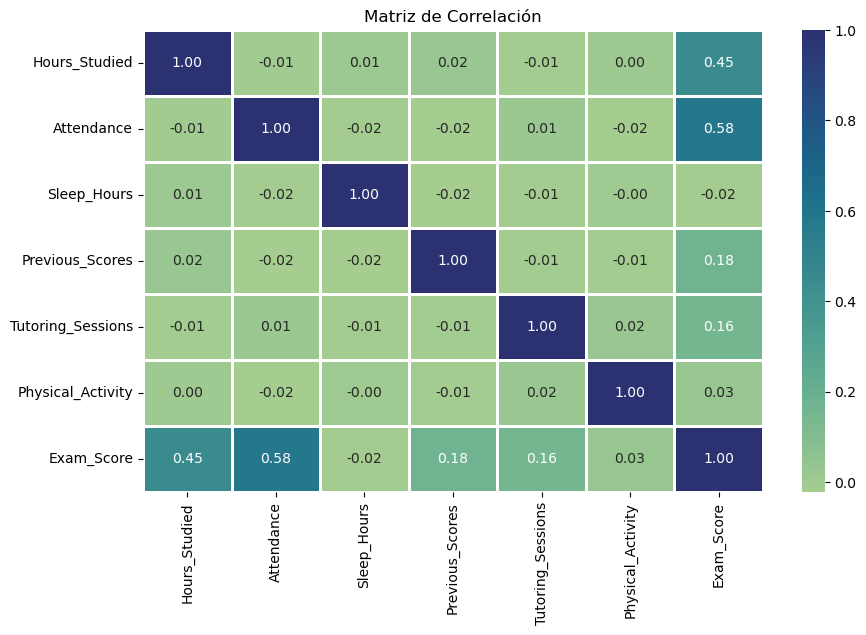

In [74]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=1)
plt.title("Matriz de Correlación")
plt.show()

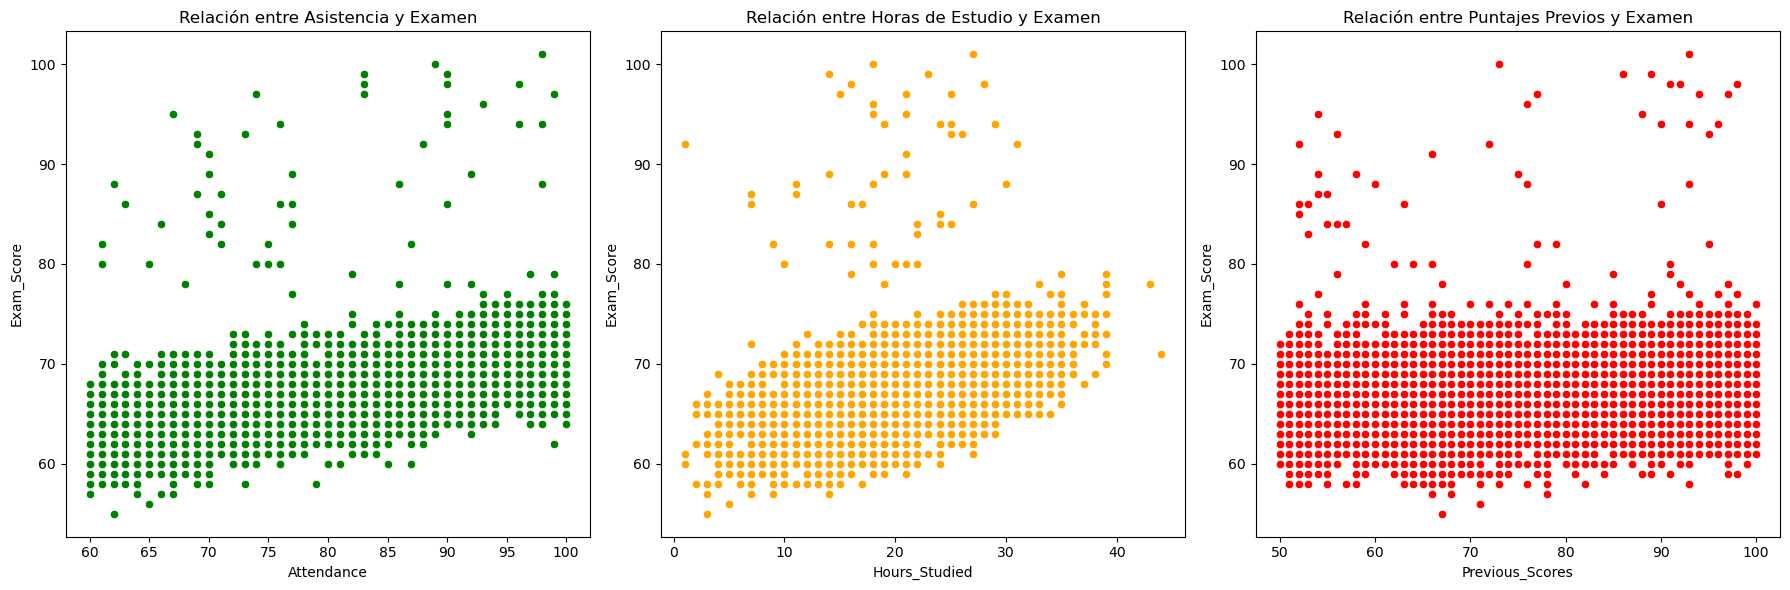

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Attendance vs Exam_Score
sns.scatterplot(data=df, x="Attendance", y="Exam_Score", ax=axes[0], color="green")
axes[0].set_title("Relación entre Asistencia y Examen")

# Hours_Studied vs Exam_Score
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score", ax=axes[1], color="orange")
axes[1].set_title("Relación entre Horas de Estudio y Examen")

# Previous_Scores vs Exam_Score
sns.scatterplot(data=df, x="Previous_Scores", y="Exam_Score", ax=axes[2], color="red")
axes[2].set_title("Relación entre Puntajes Previos y Examen")

plt.tight_layout()
plt.show()

Attendance tiene una correlación fuerte de 0.58 con Exam_Score, indicando que la asistencia es un buen predictor del desempeño en los exámenes. A medida que la asistencia aumenta, la puntuación en el exámen tiende a subir.

Hours_Studied tiene una correlación de 0.45 con Exam_Score, lo que indica una relación moderada y positiva: más horas de estudio generalmente resultan en mejores puntajes, aunque hay dispersión (algunos con pocas horas aún logran puntajes altos).

Para el casso de Previous_Scores, la gráfica muestra una relación débil. Hay bastante dispersión en los puntajes obtenidos.


Para las variables categóricas obtendremos su frecuencia y moda:

### Variables categóricas:

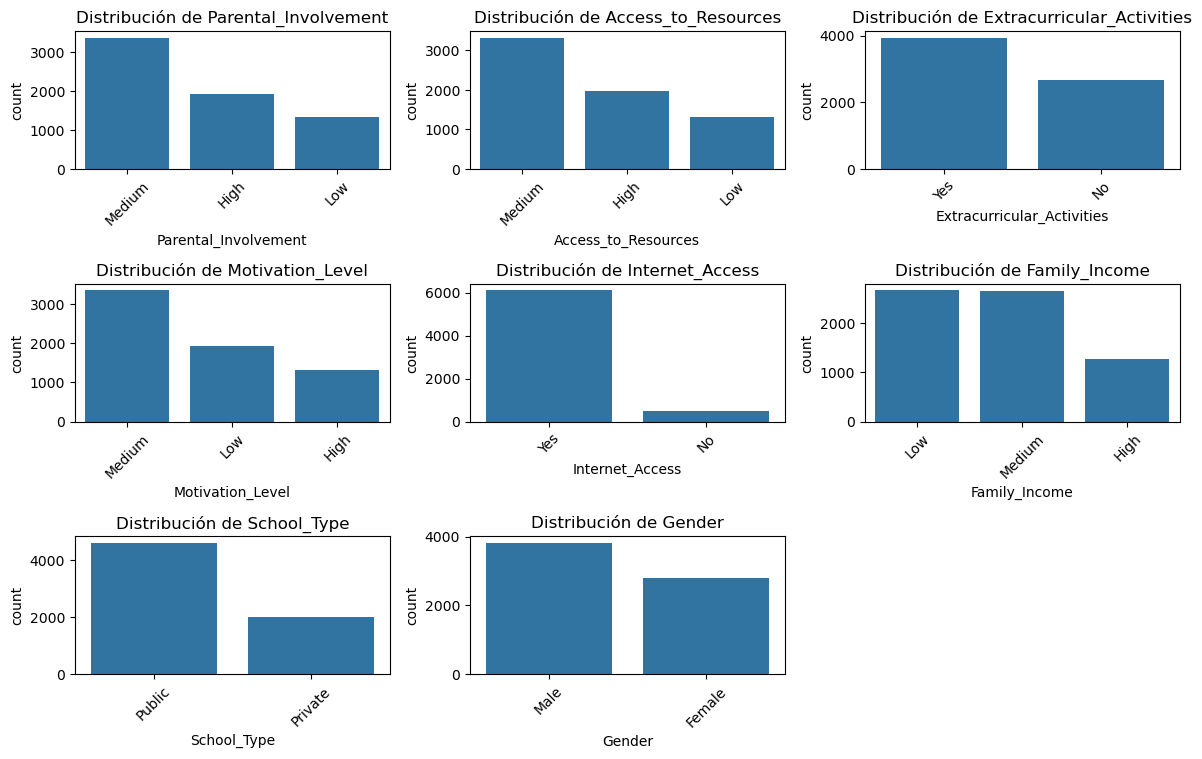

In [120]:
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'School_Type', 'Gender']

# Gráfica de frecuencia por variable
plt.figure(figsize=(12, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

In [60]:
df_summary = df[categorical_cols].describe().T

# Medidas adicionales de tendencia central y dispersión
df_summary['mode'] = df[categorical_cols].mode().iloc[0]

print(df_summary)

                           count unique     top  freq    mode
Parental_Involvement        6607      3  Medium  3362  Medium
Access_to_Resources         6607      3  Medium  3319  Medium
Extracurricular_Activities  6607      2     Yes  3938     Yes
Motivation_Level            6607      3  Medium  3351  Medium
Internet_Access             6607      2     Yes  6108     Yes
Family_Income               6607      3     Low  2672     Low
School_Type                 6607      2  Public  4598  Public
Gender                      6607      2    Male  3814    Male


Con los valores resultantes se puede oservar:
- La mayoría de los estudiantes tienen un nivel medio de involucramiento parental, acceso a recursos de educación y de motivación.
- La gran mayoría tiene acceso a Internet y participa en actividades extracurriculares.
- La mayoría proviene de familias de medio/bajo ingreso y asiste a escuelas públicas.
- Hay una mayor proporción de hombres que de mujeres en el conjunto de datos.

## Conclusiones

El análisis exploratorio del conjunto de datos revela que la mayoría de los estudiantes asisten a escuelas públicas, tienen bajos ingresos familiares y cuentan con acceso a Internet y actividades extracurriculares, aunque el acceso a recursos y el involucramiento parental suelen ser de nivel medio. Además, hay una ligera predominancia de estudiantes hombres en la muestra.

En cuanto a los hábitos y el desempeño académico, los estudiantes estudian en promedio 20 horas por semana, tienen una asistencia del 80%, y duermen alrededor de 7 horas por noche, aunque algunos duermen solo 4 horas, lo que podría afectar su rendimiento. El puntaje en exámenes promedia 67, mientras que los puntajes previos rondan los 75 puntos, sugiriendo que el desempeño general es estable. La mayoría de los estudiantes recibe 1 o 2 sesiones de tutoría y realiza 3 horas de actividad física a la semana.

Las tendencias observadas sugieren que la asistencia y el acceso a Internet son factores clave en la educación de los estudiantes, mientras que la relación entre las horas de estudio y el puntaje en exámenes no es necesariamente lineal. Además, las diferencias en acceso a recursos, nivel de motivación e ingresos familiares podrían desempeñar un papel clave en el rendimiento académico. Un análisis más profundo de correlaciones y comparaciones entre grupos permitiría identificar patrones más precisos y comprender mejor cómo estos factores influyen en el desempeño estudiantil.

## Referencias
- https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data